# Intructions

A blank code or markup cell will be left after each exercise for you to fill in with your solution.

This part of the HW is based on data from an article from the New York Times's blog, *The Upshot*. In an article titled, <a href="https://www.nytimes.com/interactive/2015/02/17/upshot/what-do-people-actually-order-at-chipotle.html"> "At Chipotle, How Many Calories Do People Really Eat?" </a>, the authors use data from about 1,800 Chipotle orders made on GrubHub. The data from this article is available here on GitHub: https://github.com/TheUpshot/chipotle . In this part of the HW, we use the data that they provide to practice working with real data. This assignment will give us some practice on manipulating, summarizing, and visualizing data with Pandas and Python.


## Description of the Data

From the NYTimes article, 

> The data is based on about 3,000 meals in about 1,800 Grubhub orders from July to December 2012, almost all from two Chipotle restaurants: one in Washington, D.C., and another in East Lansing, Mich. ... We assume people eat only one salad, burrito bowl, burrito or set of tacos at a time. When there’s more than one of those items in an order, we assume it’s for more than one person. And we assume that groups of people who order together split side items, like chips. That’s probably untrue — there’s always one guy who eats more — but assumptions about chip division don’t have a huge impact on the overall shape of our histogram.

### (Grading: 2 points per part)


# Load Data

This time we are going to pull data directly from the internet. 

### 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### 2. Import the dataset from the Upshot's GitHub page

You can access the raw file using the following url: https://raw.githubusercontent.com/TheUpshot/chipotle/master/orders.tsv

```python
url = 'https://raw.githubusercontent.com/TheUpshot/chipotle/master/orders.tsv'
# You must choose the correct separator character
#separator = ?
chipo = pd.read_csv(url, sep = separator)
```

Import the data and assign it to a variable called `chipo`.

In [2]:
url = 'https://raw.githubusercontent.com/TheUpshot/chipotle/master/orders.tsv'
chipo = pd.read_csv(url, sep = '\t')

### 3. Display the first and last 10 entries

Use `head` and `tail` to display the first and last 10 entries.

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [4]:
chipo.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


### 4. Print Info about the DataFrame

Use the `info` method to print data about the DataFrame

In [5]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB


### 5. What is the number of observations in the dataset?

In [6]:
chipo.shape[0]
# 4622 observations

4622

### 6. What is the number of columns in the dataset?

In [7]:
chipo.shape[1]

5

### 7. Print the name of all the columns.

In [8]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### 8. Describe how the dataset is indexed.

In [9]:
# Using a range of integers
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### 9. How many items were ordered in total?

In [10]:
total_items_orders = chipo.quantity.sum()
total_items_orders

4972

### 10. What were the 5 most ordered item? Do this twice, once using `groupby` and once using `pivot_table`.

Group orders by item name (only item name) and sum the quantities ordered for each item. Sort by quantity and print the top 5.
Show two ways to do this: (1) Do it using `groupby` and (2) using `pivot_table`. You should get the same result for each.

In [11]:
c = chipo.groupby('item_name').sum()
c = c.sort_values(['quantity'], ascending=False)
c[['quantity']].head()

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


In [12]:
(chipo.pivot_table('quantity', index='item_name', aggfunc='sum')
     .sort_values('quantity', ascending=False)
     .head()
)

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


### 11. What were the most ordered items in the choice_description column?

Group orders by `choice_description` and sum the quantities ordered for each item. Sort by quantity and print the top 5.

In [13]:
c = chipo.groupby('choice_description').sum()
c = c.sort_values(['quantity'], ascending=False)
c[['quantity']].head()

,quantity
choice_description,
[Diet Coke],159
[Coke],143
[Sprite],89
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",49
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]",42


### 12. Turn the item price into a float using `apply`

Usually this kind of data cleaning and reformatting would be one of the first things that we do when we load the dataset. However, for the sake of the progression of the HW, I have placed it here. Do this using the `apply` method.

In [14]:
dollarizer = lambda x: float(x.strip()[1:])
chipo['item_price'] = chipo.item_price.apply(dollarizer)

### 13. How many orders were made in the period?

In [15]:
chipo.order_id.value_counts().count()

1834

### 14. What does `item_price` mean?

Select and display all rows that represent a purchase of a '6 Pack Soft Drink'. Notice that the quantity for each row is not always equal to one. From what you can tell, what is the proper interpretation of `item_price`?

In [16]:
# item_price = quantity * "per_unit_price". 
# item_price is the revenue from the transaction represented by that row
# 
chipo.query("item_name == '6 Pack Soft Drink'")

# Or this:
#chipo[chipo.item_name == '6 Pack Soft Drink']

,order_id,quantity,item_name,choice_description,item_price
298,129,1,6 Pack Soft Drink,[Sprite],6.49
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49
357,154,1,6 Pack Soft Drink,[Coke],6.49
388,168,1,6 Pack Soft Drink,[Diet Coke],6.49
417,182,1,6 Pack Soft Drink,[Diet Coke],6.49
553,230,1,6 Pack Soft Drink,[Diet Coke],6.49
639,264,1,6 Pack Soft Drink,[Diet Coke],6.49
721,298,1,6 Pack Soft Drink,[Nestea],6.49
743,306,1,6 Pack Soft Drink,[Coke],6.49
879,363,1,6 Pack Soft Drink,[Coke],6.49


### 15. How much was the total revenue represented by the dataset?

Once we know the proper interpretation of `item_price`, this should be very easy.

In [17]:
revenue = chipo.item_price.sum()

print('Revenue was: $' + str(np.round(revenue,2)))

Revenue was: $34500.16


### 16. What is the average revenue per order?

In [18]:
chipo.groupby('order_id').sum().mean()['item_price']

18.81142857142869

### 17. How many different items are sold?

Count the unique number of items by `item_name`.

In [19]:
chipo.item_name.value_counts().count()

50

### 18. How many rows have `item_price` greater than $10.00?

How many rows are there that have `item_price` greater than 10?

In [20]:
# make the comparison
chipo10 = chipo[chipo['item_price'] > 10.00]
chipo10.head()

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
23,12,1,Chicken Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Tomati...",10.98


In [21]:
len(chipo10)

1130

### 19. Select and return the rows corresponding to the Barbacoa Bowl. Give two reasons why the item price might vary.

In [22]:
# item prices vary because of the different toppings and different quantities
chipo.query("item_name == 'Barbacoa Bowl'")

,order_id,quantity,item_name,choice_description,item_price
39,19,1,Barbacoa Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.75
58,27,1,Barbacoa Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.75
95,42,1,Barbacoa Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",9.25
115,51,1,Barbacoa Bowl,"[[Tomatillo-Red Chili Salsa (Hot), Tomatillo-G...",8.99
127,56,1,Barbacoa Bowl,"[Tomatillo Red Chili Salsa, [Rice, Pinto Beans...",9.25
136,61,1,Barbacoa Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
219,97,1,Barbacoa Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",9.25
254,110,1,Barbacoa Bowl,"[Tomatillo Red Chili Salsa, [Rice, Cheese, Let...",9.25
418,182,1,Barbacoa Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",9.25
471,202,1,Barbacoa Bowl,"[[Tomatillo-Green Chili Salsa (Medium), Roaste...",11.48


### 20. What is the average unit price of each item ordered? 

Print a DataFrame with only two columns item_name and ave_unit_price. There should be only one row for each item. Sort the DataFrame from lowest average price to highest average price. The "unit price" should be different from the "item price." The unit price compensates for the fact that sometimes the quantity is not one. Recall the proper interpretation of `item_price` above.

In [23]:
# Calculate the average price of each unit.
g = chipo.groupby('item_name')

def ave_price(x):
    total_quantity = x['quantity'].sum()
    total_revenue = x['item_price'].sum()
    return round(total_revenue/total_quantity, 2)

unit_prices = g.apply(ave_price)
unit_prices.name = 'ave_unit_price'
unit_prices = unit_prices.reset_index()
unit_prices.sort_values('ave_unit_price')

,item_name,ave_unit_price
9,Canned Soda,1.09
10,Canned Soft Drink,1.25
6,Bottled Water,1.43
37,Side of Chips,1.69
23,Chips,2.15
32,Chips and Tomatillo-Red Chili Salsa,2.39
31,Chips and Tomatillo-Green Chili Salsa,2.39
28,Chips and Roasted Chili-Corn Salsa,2.39
24,Chips and Fresh Tomato Salsa,2.78
30,Chips and Tomatillo Red Chili Salsa,2.95


### 21. Display average unit prices (from before) and item names , sorted alphabetically by item name.

Display a DataFrame with only two columns: `item_name` and `ave_unit_price`. Sort the DataFrame alphabetically by `item_name`.

In [24]:
unit_prices.sort_values('item_name')

,item_name,ave_unit_price
0,6 Pack Soft Drink,6.49
1,Barbacoa Bowl,10.19
2,Barbacoa Burrito,9.83
3,Barbacoa Crispy Tacos,10.02
4,Barbacoa Salad Bowl,10.64
5,Barbacoa Soft Tacos,10.02
6,Bottled Water,1.43
7,Bowl,7.40
8,Burrito,7.40
9,Canned Soda,1.09


### 22. What was the quantity of the most expensive line item on a receipt?
That is, look for the row with the highest `item_price`. What is the quantity ordered on that line item?

In [25]:
# Inefficient method
chipo.sort_values(by = "item_price", ascending = False).head(1)

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25


In [26]:
# More efficient
chipo.loc[[chipo.item_price.idxmax()], :]

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25


### 23. How many times did a Veggie Salad Bowl show up in an order?

That is, how many orders in our data set contained at least one Veggie Salad Bowl?

In [27]:
chipo_salad = chipo[chipo.item_name == "Veggie Salad Bowl"]

len(chipo_salad)

18

In [28]:
chipo_salad

,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
1316,536,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75
1884,760,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
2156,869,1,Veggie Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25
2223,896,1,Veggie Salad Bowl,"[Roasted Chili Corn Salsa, Fajita Vegetables]",8.75
2269,913,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75


### 24. How many times did people order more than one Bottled Water?

For the purposes of this assignment, just find out how many times a line item contains an order for bottled water that is greater than one.

In [29]:
a = chipo[(chipo.item_name == "Bottled Water") & (chipo.quantity > 1)]
len(a)

23

In [30]:
# Note that some orders contain to lines corresponding to bottled water.
# Thus, to find the correct answer, we would actually need to group by
# order_id and then find the total number of bottled water orders per
# order. For the purposes of this assignment, however, we'll ignore this
# detail
len(a.order_id.unique())

22

In [31]:
# For those interested, this is how you would do it.
g = chipo[chipo.item_name == "Bottled Water"].groupby('order_id')
# bottled water orders per order
bottled_water_orders = g.quantity.sum()
np.sum(bottled_water_orders > 1)

29

### 25. Create a bar chart showing the 5 most ordered items

The y axis should be the quantity ordered. There should be 5 distinct bars with the label of the item underneath. Use Pandas' built-in bar plotting function. See here: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.bar.html . For more information about built-in visualization with Pandas, see here: https://pandas.pydata.org/pandas-docs/stable/visualization.html

In [32]:
c = chipo.groupby('item_name').sum()
c = c.sort_values(['quantity'], ascending=False)['quantity'].head(5)

Text(0,0.5,'quantity')

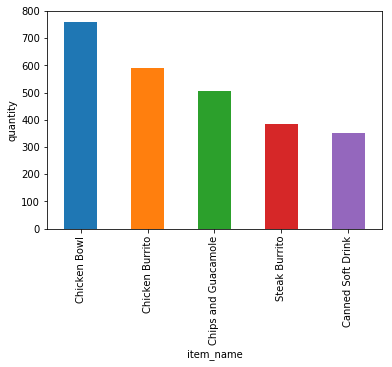

In [33]:
c.plot.bar();
plt.ylabel('quantity')